This example is based on the EDA example in Doing Data Science Ch. 2. There are 31 datasets named nyt1.csv, nyt2.csv,…,nyt31.csv, which you can find here: https://github.com/oreillymedia/doing_data_science. I have already downloaded the dataset for you to use under the folder: /nytdata

Each file represents one (simulated) day’s worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: age, gender (0=female, 1=male), number impressions, number clicks, and logged-in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lets start off analyzing one file

In [2]:
df =  pd.read_csv("dds_ch2_nyt/nyt1.csv") # read-in one file 
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


Once you have the data loaded, it’s time for some EDA:



Create a new variable, age_group, that categorizes users as "<18", "18-24", "25-34", "35-44", "45-54", "55-64", and "65+".

In [3]:
bins= [0,18,25,35,45,55,65,108]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


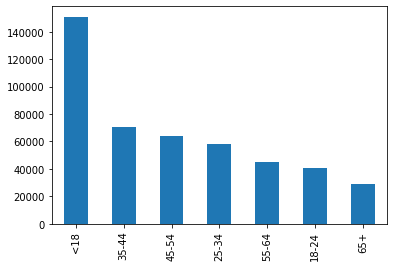

In [4]:
df['age_group'].value_counts().plot(kind='bar')

Plot the distributions of number impressions and click-through-rate for these six age categories.

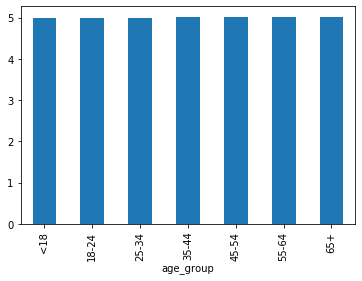

In [5]:
df.groupby("age_group")["Impressions"].mean().plot(kind='bar')

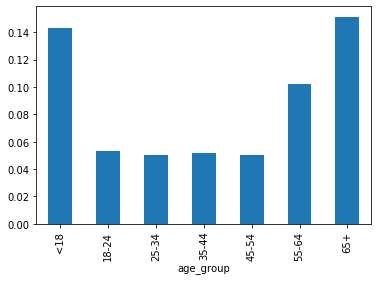

In [6]:
df.groupby("age_group").mean()["Clicks"].plot(kind='bar')

Explore the data and make visual and quantitative comparisons across user segments/demographics (<18-year-old males versus < 18-year-old females or logged-in versus not, for example).

<br><br>
Distribution of Signed_In among age_group.<br>
All ages signed for 100% and only <18 signed for 9%
<br>

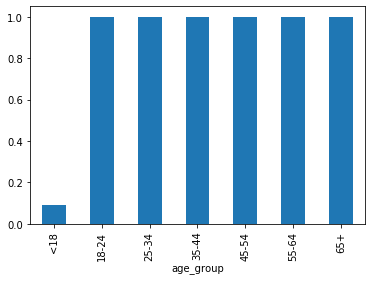

In [7]:
df.groupby('age_group')['Signed_In'].mean().plot.bar()

<br><br>
Distribution of Signed_In among Gender for age_group <18<br>
Male signed in for 100%, Female signed in for 3%.<br>
All people who is not signed in belongs to group of Female of age <18. And 97% of Female with age <18 are not signed in.
<br>

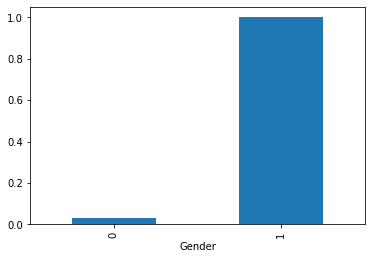

In [8]:
df.pivot_table(index='age_group', columns='Gender', values='Signed_In', 
               aggfunc=np.mean).loc['<18'].plot.bar()

We analyzed just one file, but the dataset includes 31 files (

In [9]:
import glob # used to read mutliple-files 
files = glob.glob('dds_ch2_nyt/nyt*.csv')
dfs = []
for file in files:
    df = pd.read_csv(file)
    df['filename'] = file[-6:-4]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

In [10]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,filename
0,36,0,3,0,1,t1
1,73,1,3,0,1,t1
2,30,0,3,0,1,t1
3,49,1,3,0,1,t1
4,47,1,11,0,1,t1


Analyze trends over time since we now have a historic view of the data over 31 days. 

Drop all lines with Age = 0

In [11]:
df_new = df[df['Age'] != 0].reset_index(drop=True)

Add new column age_group

In [12]:
bins= [0,18,25,35,45,55,65,108]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Plot 31 histograms (assuming files in temporary order: 1 is oldest, 31 is newest)<br>
average amount of clicks for each age group, file by file

In [13]:
cube = df.pivot_table(index = 'filename', columns = 'age_group', 
                          values = 'Clicks', aggfunc = np.mean)

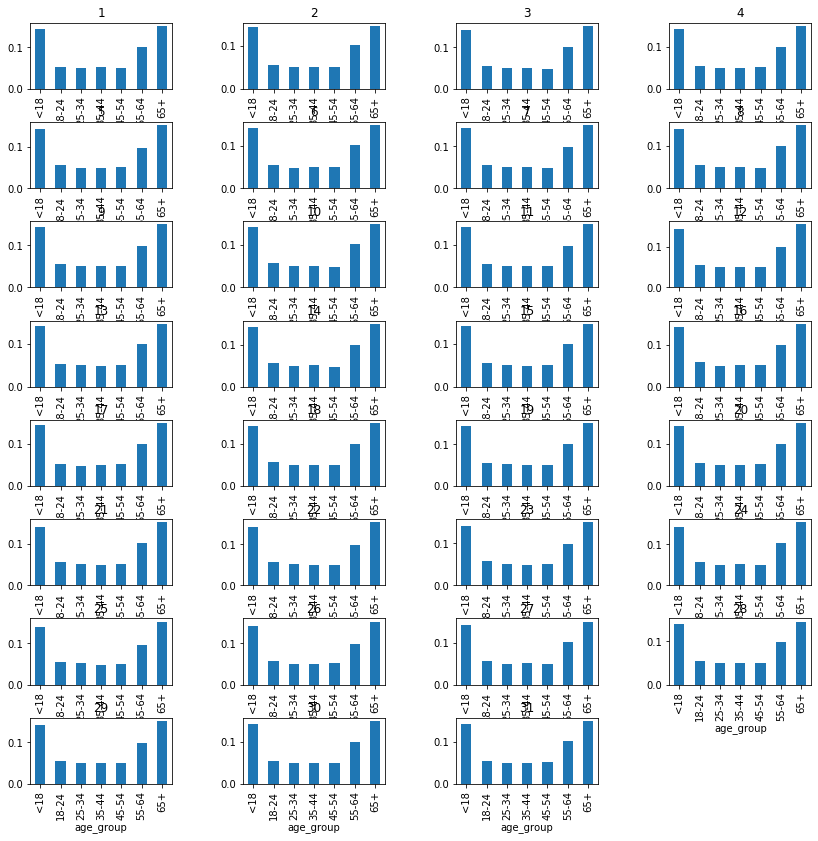

In [14]:
plt.figure(figsize = (14, 14))
plt.subplots_adjust(hspace = .5, wspace=.5)
for i in range(31):
    plt.subplot(8, 4, i+1)
    plt.title(str(i+1))
    if i < 9:
        cube.loc['t'+str(i+1)].plot.bar()
    else:
        cube.loc[str(i+1)].plot.bar()

In [15]:
cube

age_group,<18,18-24,25-34,35-44,45-54,55-64,65+
filename,,,,,,,
10,0.141738,0.056574,0.051094,0.050666,0.047919,0.102387,0.148353
11,0.142153,0.055371,0.049670,0.049380,0.049904,0.098441,0.147955
12,0.143592,0.055351,0.050915,0.049545,0.049670,0.098402,0.153880
13,0.142580,0.054366,0.049996,0.049080,0.051341,0.099238,0.147507
14,0.140956,0.055297,0.048450,0.050696,0.047829,0.099695,0.149640
15,0.142761,0.055169,0.050083,0.048249,0.051136,0.100918,0.147434
16,0.141940,0.057544,0.050185,0.051617,0.051793,0.100063,0.149641
17,0.143263,0.052947,0.048191,0.049861,0.051999,0.099641,0.148668
18,0.142106,0.057218,0.050168,0.050047,0.050299,0.100256,0.148773


I tried different criterias and all graths look approximately the same over time. See example above
<br><br>
Only noticeble trend over time I found in age group <18, Female, Signed in percentage

In [16]:
cube = df.pivot_table(index = 'filename', columns = ['age_group', 'Gender'], 
               values = 'Signed_In', aggfunc = np.mean)

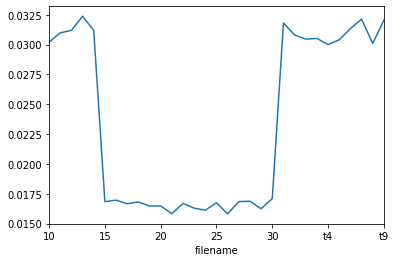

In [17]:
cube.xs('<18', level='age_group', axis=1)[0].plot()

Looks like for the first half of data files, average signed in females of age <18 was about 3%. <br>
For the second half of data it droped to ~1,6%.<br>
The last sample it came back to 3%.<br>